## Linear Regression

Linear regression is a supervised learning algorithm applied to real valued target functions in order to predict a range of possible outputs for a given input. We assume the targets are close to some linear combination of the features of the input data. Unlike other ML algorithms, linear regression has a closed-form solution.
___

### The PalmerPenguins dataset

The PalmerPenguins dataset contains data about 3 species of penguins collected from 3 islands in the Palmer Archipelago, Antarctica. For more information about this dataset you can find it [here](https://allisonhorst.github.io/palmerpenguins/).

The variables we will be using in this notebook are:
- body_mass_g: Penguin body mass in grams
- flipper_length_mm: Penguin flipper length in millimeters
___

In this notebook we will use the following packages:
- [Plots](http://docs.juliaplots.org/latest/)
- [Random](https://docs.julialang.org/en/v1/stdlib/Random/)
- [PalmerPenguins](https://juliahub.com/ui/Packages/PalmerPenguins/L7ZJc/0.1.2)
___

In [13]:
using Plots
theme(:ggplot2)
using Random
using PalmerPenguins

In [5]:
penguins = PalmerPenguins.load();
# Create the desired vectors while removing missing values
body_mass = collect(skipmissing(penguins.body_mass_g))
flipper_length = collect(skipmissing(penguins.flipper_length_mm));

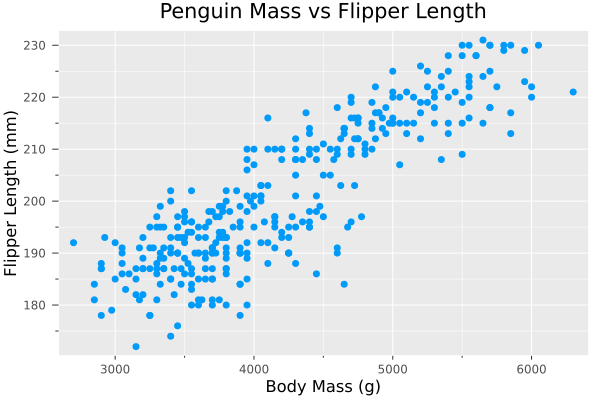

In [6]:
data = [x for x in zip(body_mass, flipper_length)]

scatter([p for p in data],
        xaxis = "Body Mass (g)",
        yaxis = "Flipper Length (mm)",
        title = "Penguin Mass vs Flipper Length",
        legend = false)

In [8]:
subset = randsubseq(data, 0.7)
train_x = [x[1] for x in data if x in subset]
train_y = [x[2] for x in data if x in subset]
train_data = [x for x in zip(train_x, train_y)]
test_data = [x for x in data if x ∉ train_data];

In [9]:
# First make the matrix X
X = ones(length(train_x), 2)
X[:, 1] = train_x

# Next solve for ŵ
ŵ = (X' * X) \ (X' * train_y)

2-element Vector{Float64}:
   0.015422095290788035
 136.14904890531201

In [10]:
# Define the regression line, i.e. the prediction function
prediction(x) = ŵ[1] * x + ŵ[2];

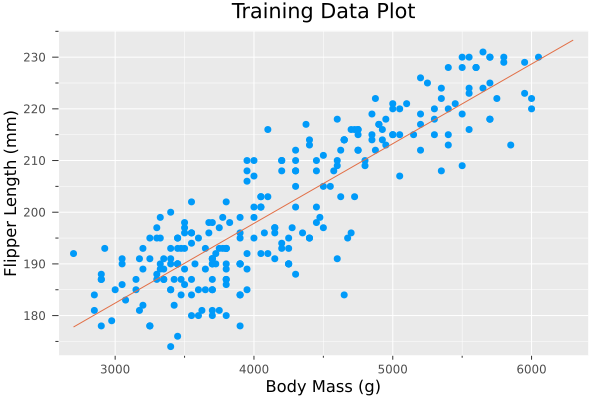

In [11]:
scatter([p for p in train_data],
        xaxis = "Body Mass (g)",
        yaxis = "Flipper Length (mm)",
        title = "Training Data Plot",
        legend = false)

plot!([(x, prediction(x)) for x = 2700:6300])

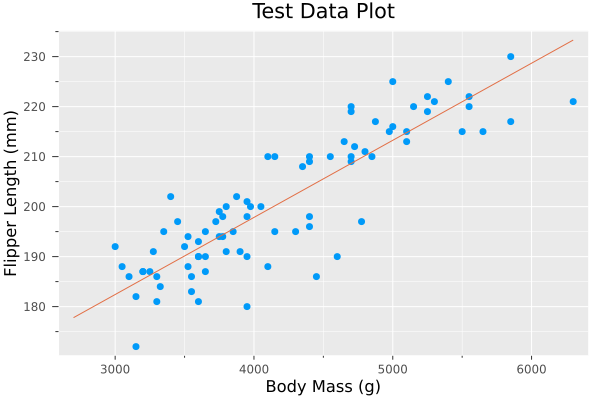

In [12]:
scatter([p for p in test_data],
        xaxis = "Body Mass (g)",
        yaxis = "Flipper Length (mm)",
        title = "Test Data Plot",
        legend = false)

plot!([(x, prediction(x)) for x = 2700:6300])

In [15]:
error_array = [abs(prediction(x[1]) - x[2]) for x in train_data]

259-element Vector{Float64}:
 12.981906245767135
  8.753011010306551
  8.729141399626883
  3.6447223414692758
 11.054144334418652
 13.247344389746075
  3.2591699591995678
 11.692953891161153
 13.210801481227747
  3.4997538358337295
  8.210801481227747
  5.644722341469276
  8.548477713858176
  ⋮
  9.535941344299431
  5.174750901041961
 11.572484252817787
  4.391465166996454
  0.8130681294519206
  4.729141399626883
  4.391465166996454
  7.246988989693449
  8.933674696075258
  3.4396967166883314
  9.162569931535842
  1.367458628036843

In [16]:
maximum(error_array)

23.861792007476367

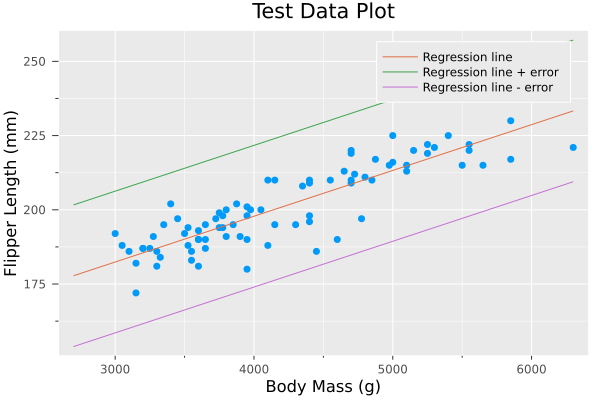

In [17]:
scatter([p for p in test_data],
        label = false,
        xaxis = "Body Mass (g)",
        yaxis = "Flipper Length (mm)",
        title = "Test Data Plot")

plot!([(x, prediction(x)) for x = 2700:6300],
        label = "Regression line")

plot!([(x, prediction(x) + maximum(error_array)) for x = 2700:6300],
        label = "Regression line + error")

plot!([(x, prediction(x) - maximum(error_array)) for x = 2700:6300],
        label = "Regression line - error")

In [18]:
prediction_interval(x) = (prediction(x) - maximum(error_array), prediction(x) + maximum(error_array))

prediction_interval (generic function with 1 method)

In [19]:
test_data

83-element Vector{Tuple{Int64, Int64}}:
 (3650, 190)
 (3300, 186)
 (3800, 191)
 (4400, 198)
 (3325, 184)
 (3550, 183)
 (3200, 187)
 (3150, 172)
 (3950, 180)
 (3950, 190)
 (3300, 181)
 (3150, 182)
 (3100, 186)
 ⋮
 (3200, 187)
 (3850, 195)
 (3650, 187)
 (3250, 187)
 (3950, 201)
 (3600, 193)
 (3450, 197)
 (3525, 194)
 (3650, 195)
 (3400, 202)
 (4100, 210)
 (3775, 198)

In [20]:
prediction_interval(3950)

(173.20453329644837, 220.9281173114011)